In [157]:
using DifferentialEquations
using Plots
using LinearAlgebra

In [158]:
# WSCC 3 machine 9 bus power system simulation by solving DAE using Mass Matrix DAE. 

# We consider the system was simulated 0 to 10 seconds and then a three-phase fault occured near bus 7 at the end of line 5-7 and cleared in five cycles (0.083s) by opening line 5-7. 

# We have three DAE problem to solve( 0-10s,10-10.086s and 10.086-20s). 

# We have 3  different Y matix for pre fault, fault on and post fault condition.

# System data, equations were taken from BWang's paper

In [159]:
# Defining the variables, parameters, deifferential equations, algebraic equations

function Ps(du, u, p, t)
    del1, w1, del2, w2, del3, w3, P_e1, P_e2, P_e3 = u
    Ws, H1, H2, H3,   D1, D2, D3,  P_m1, P_m2, P_m3,    X_d_p1, X_d_p2, X_d_p3,    e_q_p1, e_q_p2, e_q_p3,    R_a1, R_a2, R_a3, 
    a_11, a_12, a_13, a_14, a_15, a_16, a_21, a_22, a_23, a_24, a_25, a_26, a_31, a_32, a_33, a_34, a_35, a_36, a_41, a_42,
    a_43, a_44, a_45, a_46, a_51, a_52, a_53, a_54, a_55, a_56, a_61, a_62, a_63, a_64, a_65, a_66= p
    

    du[1] = Ws*(w1-1)
    du[2] = (P_m1-P_e1-D1*(w1*Ws-Ws))/(2*H1)
    du[3] = Ws*(w2-1)
    du[4] = (P_m2-P_e2-D2*(w2*Ws-Ws))/(2*H2)
    du[5] = Ws*(w3-1)
    du[6] = (P_m3-P_e3-D3*(w3*Ws-Ws))/(2*H3)
    du[7] = -P_e1+(-R_a1*(a_11*e_q_p1*cos(del1) + a_12*e_q_p1*sin(del1) + a_13*e_q_p2*cos(del2) + a_14*e_q_p2*sin(del2) 
            + a_15*e_q_p3*cos(del3) + a_16*e_q_p3*sin(del3)) + X_d_p1*(a_21*e_q_p1*cos(del1) + a_22*e_q_p1*sin(del1) 
            + a_23*e_q_p2*cos(del2) + a_24*e_q_p2*sin(del2) + a_25*e_q_p3*cos(del3) + a_26*e_q_p3*sin(del3)) 
            + e_q_p1*cos(del1))*(a_11*e_q_p1*cos(del1) + a_12*e_q_p1*sin(del1) + a_13*e_q_p2*cos(del2) + a_14*e_q_p2*sin(del2) 
            + a_15*e_q_p3*cos(del3) + a_16*e_q_p3*sin(del3)) + (-R_a1*(a_21*e_q_p1*cos(del1) + a_22*e_q_p1*sin(del1) 
            + a_23*e_q_p2*cos(del2) + a_24*e_q_p2*sin(del2) + a_25*e_q_p3*cos(del3) + a_26*e_q_p3*sin(del3)) 
            - X_d_p1*(a_11*e_q_p1*cos(del1) + a_12*e_q_p1*sin(del1) + a_13*e_q_p2*cos(del2) + a_14*e_q_p2*sin(del2) 
            + a_15*e_q_p3*cos(del3) + a_16*e_q_p3*sin(del3)) + e_q_p1*sin(del1))*(a_21*e_q_p1*cos(del1) + a_22*e_q_p1*sin(del1) 
            + a_23*e_q_p2*cos(del2) + a_24*e_q_p2*sin(del2) + a_25*e_q_p3*cos(del3) + a_26*e_q_p3*sin(del3))
    du[8] = -P_e2+(-R_a2*(a_31*e_q_p1*cos(del1) + a_32*e_q_p1*sin(del1) + a_33*e_q_p2*cos(del2) + a_34*e_q_p2*sin(del2) 
            + a_35*e_q_p3*cos(del3) + a_36*e_q_p3*sin(del3)) + X_d_p2*(a_41*e_q_p1*cos(del1) + a_42*e_q_p1*sin(del1) 
            + a_43*e_q_p2*cos(del2) + a_44*e_q_p2*sin(del2) + a_45*e_q_p3*cos(del3) + a_46*e_q_p3*sin(del3)) 
            + e_q_p2*cos(del2))*(a_31*e_q_p1*cos(del1) + a_32*e_q_p1*sin(del1) + a_33*e_q_p2*cos(del2) + a_34*e_q_p2*sin(del2) 
            + a_35*e_q_p3*cos(del3) + a_36*e_q_p3*sin(del3)) + (-R_a2*(a_41*e_q_p1*cos(del1) + a_42*e_q_p1*sin(del1) 
            + a_43*e_q_p2*cos(del2) + a_44*e_q_p2*sin(del2) + a_45*e_q_p3*cos(del3) + a_46*e_q_p3*sin(del3)) 
            - X_d_p2*(a_31*e_q_p1*cos(del1) + a_32*e_q_p1*sin(del1) + a_33*e_q_p2*cos(del2) + a_34*e_q_p2*sin(del2) 
            + a_35*e_q_p3*cos(del3) + a_36*e_q_p3*sin(del3)) + e_q_p2*sin(del2))*(a_41*e_q_p1*cos(del1) + a_42*e_q_p1*sin(del1) 
            + a_43*e_q_p2*cos(del2) + a_44*e_q_p2*sin(del2) + a_45*e_q_p3*cos(del3) + a_46*e_q_p3*sin(del3))
    du[9] = -P_e3+(-R_a3*(a_51*e_q_p1*cos(del1) + a_52*e_q_p1*sin(del1) + a_53*e_q_p2*cos(del2) + a_54*e_q_p2*sin(del2) 
            + a_55*e_q_p3*cos(del3) + a_56*e_q_p3*sin(del3)) + X_d_p3*(a_61*e_q_p1*cos(del1) + a_62*e_q_p1*sin(del1) 
            + a_63*e_q_p2*cos(del2) + a_64*e_q_p2*sin(del2) + a_65*e_q_p3*cos(del3) + a_66*e_q_p3*sin(del3)) 
            + e_q_p3*cos(del3))*(a_51*e_q_p1*cos(del1) + a_52*e_q_p1*sin(del1) + a_53*e_q_p2*cos(del2) + a_54*e_q_p2*sin(del2) 
            + a_55*e_q_p3*cos(del3) + a_56*e_q_p3*sin(del3)) + (-R_a3*(a_61*e_q_p1*cos(del1) + a_62*e_q_p1*sin(del1) 
            + a_63*e_q_p2*cos(del2) + a_64*e_q_p2*sin(del2) + a_65*e_q_p3*cos(del3) + a_66*e_q_p3*sin(del3)) 
            - X_d_p3*(a_51*e_q_p1*cos(del1) + a_52*e_q_p1*sin(del1) + a_53*e_q_p2*cos(del2) + a_54*e_q_p2*sin(del2) 
            + a_55*e_q_p3*cos(del3) + a_56*e_q_p3*sin(del3)) + e_q_p3*sin(del3))*(a_61*e_q_p1*cos(del1) + a_62*e_q_p1*sin(del1) 
            + a_63*e_q_p2*cos(del2) + a_64*e_q_p2*sin(del2) + a_65*e_q_p3*cos(del3) + a_66*e_q_p3*sin(del3))
    nothing
end

Ps (generic function with 1 method)

In [160]:
# Mass matrix 

M = [1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0.]

9×9 Matrix{Float64}:
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [161]:
# DAE function

f = ODEFunction(Ps, mass_matrix = M)

(::ODEFunction{true, SciMLBase.FullSpecialize, typeof(Ps), Matrix{Float64}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Nothing, Nothing}) (generic function with 1 method)

In [162]:
# Pre fault DAE formulation for 0-10 seconds using the initial values from Data provided in BWang's paper
# P_e1,Pe_2 and P_e3 calculated as per BWang's paper using the same data

u10=[0.0626, 1,   1.0567, 1,   0.9449, 1,    1.43824549482149, 1.040964945989, 0.757527164510807] #del1, w1, del2, w2, del3, w3, P_e1, P_e2, P_e3
tsp1=(0.0, 10)
p10=(376.9911, 23.64, 6.4, 3.01,    23.64, 6.4, 3.01,    # Ws, H1, H2, H3,   D1, D2, D3
    0.7164, 1.63, 0.85,   0.0608, 0.1198, 0.1813,       # P_m1, P_m2, P_m3,    X_d_p1, X_d_p2, X_d_p3
    1.0566, 1.0502, 1.0170, 0, 0, 0,                    #e_q_p1, e_q_p2, e_q_p3,    R_a1, R_a2, R_a3
    0.8455, 2.9883, 0.2871, -1.5129, 0.2096, -1.2256, -2.9883, 0.8455, 1.5129, 0.2871, 1.2256, 0.2096, # a11-a26 of Y
    0.2871, -1.5129, 0.4200, 2.7239, 0.2133, -1.0879, 1.5129, 0.2871, -2.7239, 0.4200, 1.0879, 0.2133, # a31-a46 of Y
    0.2096, -1.2256, 0.2133, -1.0879, 0.2770, 2.3681, 1.2256, 0.2096, 1.0879, 0.2133, -2.3681, 0.2770) # a51-a56 of Y


(376.9911, 23.64, 6.4, 3.01, 23.64, 6.4, 3.01, 0.7164, 1.63, 0.85, 0.0608, 0.1198, 0.1813, 1.0566, 1.0502, 1.017, 0, 0, 0, 0.8455, 2.9883, 0.2871, -1.5129, 0.2096, -1.2256, -2.9883, 0.8455, 1.5129, 0.2871, 1.2256, 0.2096, 0.2871, -1.5129, 0.42, 2.7239, 0.2133, -1.0879, 1.5129, 0.2871, -2.7239, 0.42, 1.0879, 0.2133, 0.2096, -1.2256, 0.2133, -1.0879, 0.277, 2.3681, 1.2256, 0.2096, 1.0879, 0.2133, -2.3681, 0.277)

In [163]:
# prob1 = ODEProblem(f, [0.0626, 1, 1.0567, 1, 0.9449, 1, 1.43824549482149, 1.040964945989, 0.757527164510807  ], (0.0, 10), (376.9911, 23.64, 6.4, 3.01,    23.64, 6.4, 3.01,    0.7164, 1.63, 0.85,   0.0608, 0.1198, 0.1813, 1.0566, 1.0502, 1.0170, 0, 0, 0, 0.8455, 2.9883, 0.2871, -1.5129, 0.2096, -1.2256, -2.9883, 0.8455, 1.5129, 0.2871, 1.2256, 0.2096, 0.2871, -1.5129, 0.4200, 2.7239, 0.2133, -1.0879, 1.5129, 0.2871, -2.7239, 0.4200, 1.0879, 0.2133, 0.2096, -1.2256, 0.2133, -1.0879, 0.2770, 2.3681, 1.2256, 0.2096, 1.0879, 0.2133, -2.3681, 0.2770))

In [164]:
# Pre fault DAE solution of 6 variables (del1, w1, del2, w2, del3, w3)

t_values = range(0,10, length=100)
# tspan1 = (0, 10)


prob1=ODEProblem(f, u10, tsp1, p10)
sol1 = solve(prob1, Rodas5(), reltol = 1e-4, abstol = 1e-4,saveat=t_values);
# sol1 = solve(prob1, Rodas5(), reltol = 1e-4, abstol = 1e-4);

t_values = sol1.t
del1_values = [sol1(t)[1] for t in t_values]  
w1_values = [sol1(t)[2] for t in t_values] 
# println("Time Points (t): ", t_values)
println("del1_target_values=", del1_values)
println("omega1_target_values=", w1_values)


del2_values = [sol1(t)[3] for t in t_values]  
w2_values = [sol1(t)[4] for t in t_values] 
# println("Time Points (t): ", t_values)
println("del2_target_values=", del2_values)
println("omega2_target_values=", w2_values)



del3_values = [sol1(t)[5] for t in t_values]  
w3_values = [sol1(t)[6] for t in t_values] 
# println("Time Points (t): ", t_values)
println("del3_target_values=", del3_values)
println("omega3_target_values=", w3_values)

del1_target_values=[0.0626, 0.07011511700126488, 0.07781808464088463, 0.08528731252235024, 0.09252561232632919, 0.09953627253483219, 0.10632298558469415, 0.11288978592381416, 0.11924099550094004, 0.12538116092310436, 0.1313150214749864, 0.13704746128002537, 0.14258346593202448, 0.1479280980321741, 0.15308647180975246, 0.1580637231704054, 0.162864979448481, 0.16749535092036527, 0.17195992276795335, 0.17626372398609969, 0.18041172093460003, 0.18440880330416648, 0.18825978411642774, 0.19196939929507387, 0.19554228187986128, 0.19898296573960586, 0.20229588029414014, 0.20548535048126088, 0.20855559682179, 0.21151074046976706, 0.2143547838168953, 0.2170916139850914, 0.2197250100699584, 0.22225864314078608, 0.22469607624055052, 0.22704076402879042, 0.2292960674376365, 0.23146523256816745, 0.2335513914684538, 0.2355575804690473, 0.23748674018298058, 0.2393417155057674, 0.24112525561540263, 0.24284001373755157, 0.244488560938238, 0.24607339087230434, 0.24759687898979374, 0.2490613254879243, 0.2

del3_target_values=[0.9449, 0.9233097919293766, 0.9015941600961741, 0.8809449300929801, 0.8613211152265107, 0.8426809446472738, 0.8249823447176721, 0.808183311417506, 0.7922422287961758, 0.7771182078526278, 0.762771217952042, 0.7491623195217852, 0.7362538298554815, 0.7240093894575943, 0.712393991591014, 0.701374131325954, 0.6909177891355154, 0.6809944319614829, 0.6715749401629179, 0.6626317090608779, 0.6541385840829863, 0.6460707700002781, 0.6384048309271991, 0.6311185759401254, 0.6241910812019784, 0.6176026930846807, 0.6113348243075019, 0.6053699537608782, 0.5996916279365222, 0.5942842847938757, 0.5891333103689427, 0.5842250562857106, 0.5795466088275281, 0.5750857889371048, 0.5708311522165118, 0.5667719919656037, 0.5628981119591714, 0.5591999745600454, 0.5556686992992352, 0.5522958575553165, 0.5490734725544307, 0.5459940193702864, 0.5430504249241577, 0.5402360690055024, 0.5375446381763854, 0.5349701103754473, 0.5325069714583156, 0.5301499593453394, 0.5278940640215889, 0.52573452753685

In [165]:
# Extracting pre fault solution for 6 variables plotting

y1 = sol1[1, :];
y2 = sol1[2, :];
y3 = sol1[3, :];
y4 = sol1[4, :];
y5 = sol1[5, :];
y6 = sol1[6, :];

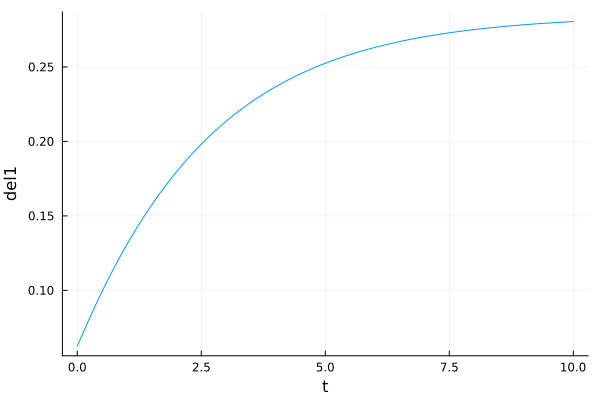

In [167]:
# Pre fault solution plot of del1

p1 = plot(sol1.t, y1, xlabel = "t", ylabel = "del1", legend = false)

# 

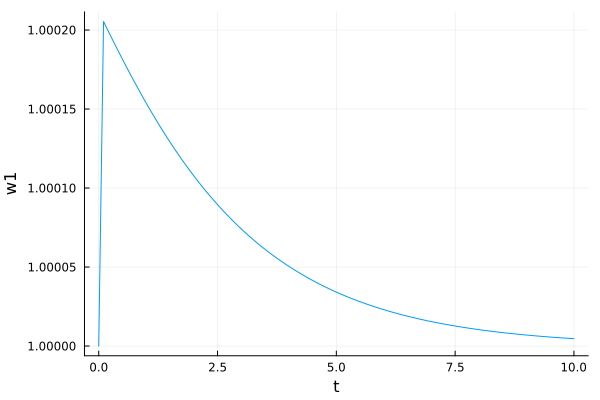

In [168]:
# Pre fault solution plot of w1

p2 = plot(sol1.t, y2, xlabel = "t", ylabel = "w1", legend = false)

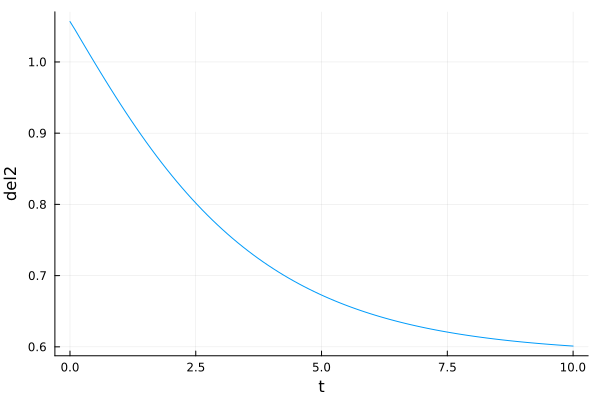

In [169]:
# Pre fault solution plot of del2

p3 = plot(sol1.t, y3, xlabel = "t", ylabel = "del2", legend = false)

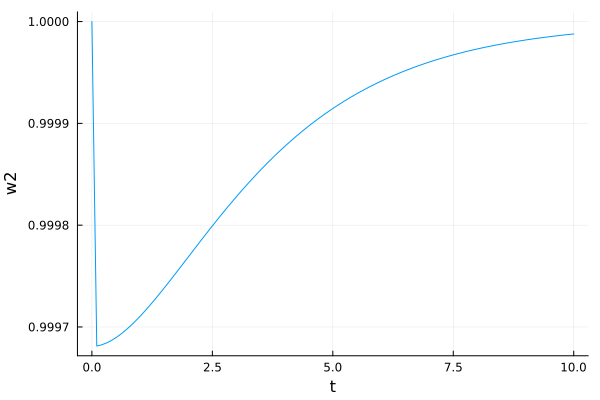

In [170]:
# Pre fault solution plot of w2


p4 = plot(sol1.t, y4, xlabel = "t", ylabel = "w2", legend = false)

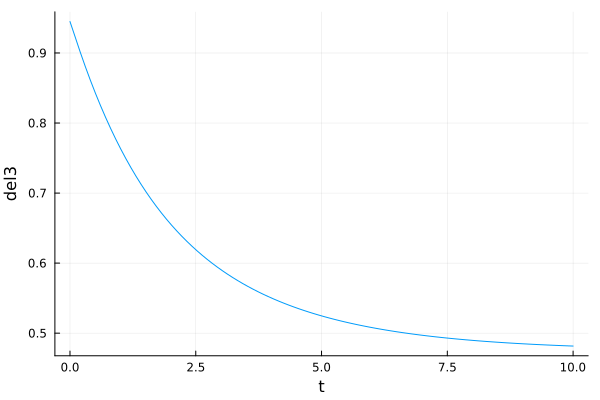

In [171]:
# Pre fault solution plot of del3

p5 = plot(sol1.t, y5, xlabel = "t", ylabel = "del3", legend = false)

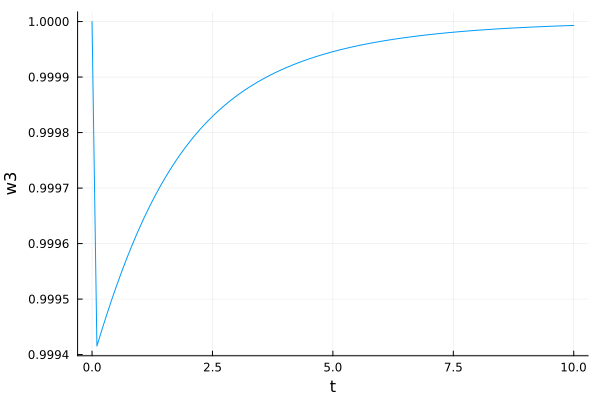

In [172]:
# Pre fault solution plot of w3

p6 = plot(sol1.t, y6, xlabel = "t", ylabel = "w3", legend = false)

In [173]:
# Extracting end solution at 10s to feed as initial values for fault on calculation

q=length(sol1.u)
i2=sol1.u[q]

9-element Vector{Float64}:
 0.2804973072795233
 1.0000046737616586
 0.6010975528223498
 0.999987822900838
 0.4816056008516666
 0.9999929868959316
 0.674835588279386
 1.659318141505159
 0.8579411222206508

In [174]:
# Fault on DAE formulation for 10-10.083 seconds using the initial values from the end solution at 10s from pre fault solution
# P_e1,Pe_2 and P_e3 taken from the end solution at 10s from pre fault solution
# New Y matrix taken from BWang's Paper for fault on condition

u20=[i2[1], i2[2], i2[3], i2[4], i2[5], i2[6],   i2[7], i2[8], i2[9]] # del1, w1, del2, w2, del3, w3, P_e1, P_e2, P_e3
tsp2=(10.0, 10.083)
p20=(376.9911, 23.64, 6.4, 3.01,    23.64, 6.4, 3.01,    # Ws, H1, H2, H3,   D1, D2, D3
    0.7164, 1.63, 0.85,   0.0608, 0.1198, 0.1813,       # P_m1, P_m2, P_m3,    X_d_p1, X_d_p2, X_d_p3
    1.0566, 1.0502, 1.0170, 0, 0, 0,                    #e_q_p1, e_q_p2, e_q_p3,    R_a1, R_a2, R_a3
    0.657, 3.816, 0, 0, 0.070, -0.631, -3.816, 0.657, 0, 0, 0.631, 0.070, # a11-a26 of Y
    0, 0, 0, 5.486, 0, 0, 0, 0, -5.486, 0, 0, 0,                          # a31-a46 of Y
    0.070, -0.631, 0, 0, 0.174, 2.796, 0.631, 0.070, 0, 0, -2.796, 0.174) # a51-a66 of Y

prob2=ODEProblem(f, u20, tsp2, p20)

ODEProblem with uType Vector{Float64} and tType Float64. In-place: true
timespan: (10.0, 10.083)
u0: 9-element Vector{Float64}:
 0.2804973072795233
 1.0000046737616586
 0.6010975528223498
 0.999987822900838
 0.4816056008516666
 0.9999929868959316
 0.674835588279386
 1.659318141505159
 0.8579411222206508

In [175]:
# prob2=ODEProblem(f, [i2[1], i2[2], i2[3], i2[4], i2[5], i2[6],   i2[7], i2[8], i2[9]  ], (10.0, 10.083), (376.9911, 23.64, 6.4, 3.01,    23.64, 6.4, 3.01,    0.7164, 1.63, 0.85,     0.0608, 0.1198, 0.1813,    1.0566, 1.0502, 1.0170,     0, 0, 0,     0.657, 3.816, 0, 0, 0.070, -0.631,      -3.816, 0.657, 0, 0, 0.631, 0.070,      0, 0, 0, 5.486, 0, 0,      0, 0, -5.486, 0, 0, 0,       0.070, -0.631, 0, 0, 0.174, 2.796,       0.631, 0.070, 0, 0, -2.796, 0.174))

In [176]:
# Fault on DAE solution of 6 variables (del1, w1, del2, w2, del3, w3)
t_values = range(10,10.083, length=20)
sol2 = solve(prob2, Rodas5(), reltol = 1e-4, abstol = 1e-4,saveat=t_values) ;

In [177]:
t_values = sol2.t
del1_values = [sol2(t)[1] for t in t_values]  
w1_values = [sol2(t)[2] for t in t_values] 
# println("Time Points (t): ", t_values)
println("del1_target_values=", del1_values)
println("omega1_target_values=", w1_values)


del2_values = [sol2(t)[3] for t in t_values]  
w2_values = [sol2(t)[4] for t in t_values] 
# println("Time Points (t): ", t_values)
println("del2_target_values=", del2_values)
println("omega2_target_values=", w2_values)


del3_values = [sol2(t)[5] for t in t_values]  
w3_values = [sol2(t)[6] for t in t_values] 
# println("Time Points (t): ", t_values)
println("del3_target_values=", del3_values)
println("omega3_target_values=", w3_values)

del1_target_values=[0.2804973072795233, 0.2805051830226228, 0.2805132876769802, 0.28052152499013744, 0.2805298607697809, 0.2805382834328676, 0.28054678945609185, 0.2805553778911808, 0.280564048587638, 0.28057280154696873, 0.280581636782178, 0.2805905542741075, 0.2805995539667384, 0.28060863579163126, 0.2806177996707924, 0.2806270455167802, 0.28063637323921103, 0.28064578274747354, 0.2806552739499121, 0.2806648467545078]
omega1_target_values=[1.0000046737616586, 1.0000048667724495, 1.0000049669779199, 1.0000050336071997, 1.0000050886035976, 1.000005139870755, 1.00000519006299, 1.0000052400275043, 1.000005289972429, 1.0000053399321678, 1.000005389889065, 1.0000054398212996, 1.0000054897166084, 1.0000055395661418, 1.0000055893642863, 1.0000056391086325, 1.0000056887981608, 1.0000057384322039, 1.0000057880104263, 1.0000058375326975]
del2_target_values=[0.6010975528223498, 0.60143836886673, 0.6022122070548296, 0.603176079912551, 0.6042234434484818, 0.6053073452339547, 0.6064073752449287, 0.

del3_target_values=[0.4816056008516666, 0.48181083408192327, 0.482276085143536, 0.4828552050967025, 0.48348405114994225, 0.4841343303734485, 0.48479373265491055, 0.4854567582352516, 0.48612105525170407, 0.48678555296545567, 0.4874497881465937, 0.4881135633897069, 0.4887767980888316, 0.4894394489054983, 0.49010149330009745, 0.4907629292536171, 0.4914237564092188, 0.4920839718816084, 0.49274357589174145, 0.49340256896722073]
omega3_target_values=[0.9999929868959316, 1.000224781456549, 1.000326404594554, 1.0003708474656123, 1.000390145122699, 1.000398428222867, 1.0004018451696832, 1.0004031430899303, 1.0004034969649758, 1.0004034419474714, 1.0004032097827746, 1.0004028994558163, 1.0004025516182231, 1.000402188308696, 1.0004018211778964, 1.0004014516274193, 1.0004010802282481, 1.0004007088136657, 1.000400337665102, 1.000399966910345]


In [178]:
# Extracting fault on solution for 6 variables plotting

y7 = sol2[1, :];
y8 = sol2[2, :];
y9 = sol2[3, :];
y10 = sol2[4, :];
y11 = sol2[5, :];
y12 = sol2[6, :];

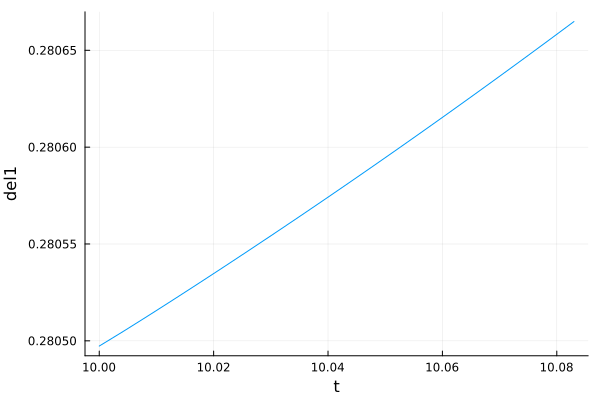

In [180]:
# Fault on solution plot of del1

p7 = plot(sol2.t, y7, xlabel = "t", ylabel = "del1", legend = false)

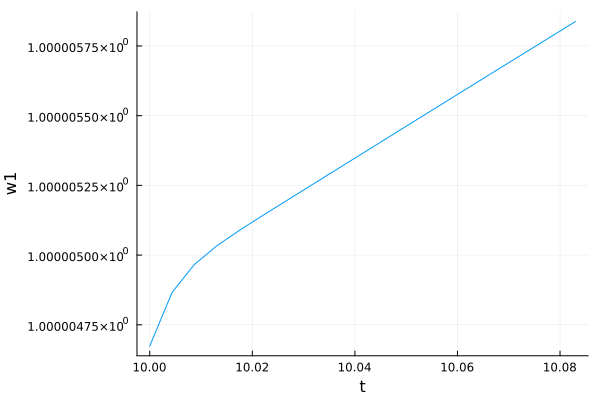

In [181]:
# Fault on solution plot of w1

p8 = plot(sol2.t, y8, xlabel = "t", ylabel = "w1", legend = false)

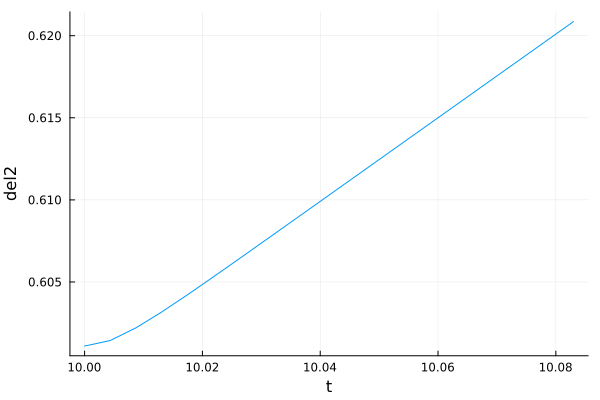

In [182]:
# Fault on solution plot of del2

p9 = plot(sol2.t, y9, xlabel = "t", ylabel = "del2", legend = false)

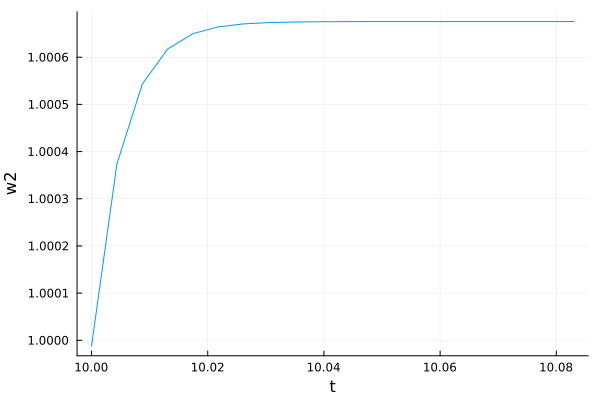

In [183]:
# Fault on solution plot of w2

p10 = plot(sol2.t, y10, xlabel = "t", ylabel = "w2", legend = false)

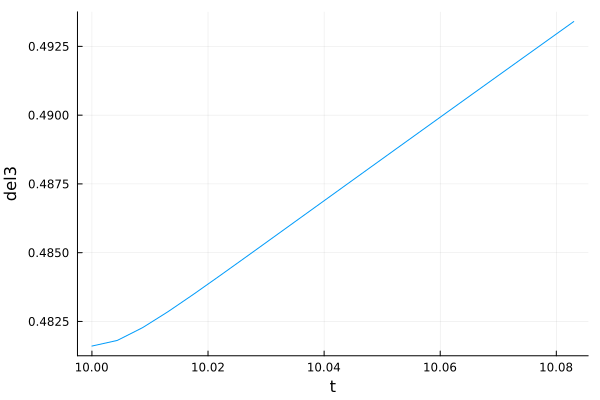

In [184]:
# Fault on solution plot of del3

p11 = plot(sol2.t, y11, xlabel = "t", ylabel = "del3", legend = false)

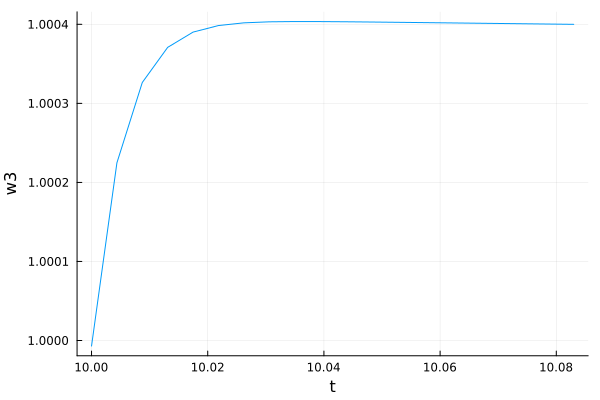

In [185]:
# Fault on solution plot of w3

p12 = plot(sol2.t, y12, xlabel = "t", ylabel = "w3", legend = false)

In [186]:
# Extracting end solution at 10.083s to feed as initial values for post fault calculation

q1=length(sol2.u)
i3=sol2.u[q1]

9-element Vector{Float64}:
  0.2806648467545078
  1.0000058375326975
  0.620861102090323
  1.0006755795168523
  0.49340256896722073
  1.000399966910345
  0.6638398189150766
 -2.4612843441719844e-16
  0.39665090574736156

In [187]:
# post fault DAE formulation for 10.083-20 seconds using the initial values from the end solution at 10.086s from fault on solution
# P_e1,Pe_2 and P_e3 taken from the end solution at 10.086s from fault on solution
# New Y matrix taken from BWang's Paper for post fault condition


u30=[i3[1], i3[2], i3[3], i3[4], i3[5], i3[6],   i3[7], i3[8], i3[9]] # del1, w1, del2, w2, del3, w3, P_e1, P_e2, P_e3
tsp3=(10.083, 20.0)
p30=(376.9911, 23.64, 6.4, 3.01,    23.64, 6.4, 3.01,    # Ws, H1, H2, H3,   D1, D2, D3
    0.7164, 1.63, 0.85,   0.0608, 0.1198, 0.1813,       # P_m1, P_m2, P_m3,    X_d_p1, X_d_p2, X_d_p3
    1.0566, 1.0502, 1.0170, 0, 0, 0,                    #e_q_p1, e_q_p2, e_q_p3,    R_a1, R_a2, R_a3
    1.181, 2.229, 0.138, -0.726, 0.191, -1.079, -2.229, 1.181, 0.726, 0.138, 1.079, 0.191,   # a11-a26 of Y
    0.138, -0.726, 0.389, 1.953, 0.199, -1.229, 0.726, 0.138, -1.953, 0.389, 1.229, 0.199,   # a31-a46 of Y
    0.191, -1.079, 0.199, -1.299, 0.273, 2.342, 1.079, 0.191, 0.174, 0.199, -2.342, 0.273)   # a51-a56 of Y

prob3=ODEProblem(f, u30, tsp3, p30)

ODEProblem with uType Vector{Float64} and tType Float64. In-place: true
timespan: (10.083, 20.0)
u0: 9-element Vector{Float64}:
  0.2806648467545078
  1.0000058375326975
  0.620861102090323
  1.0006755795168523
  0.49340256896722073
  1.000399966910345
  0.6638398189150766
 -2.4612843441719844e-16
  0.39665090574736156

In [188]:
# prob3=ODEProblem(f, [i3[1], i3[2], i3[3], i3[4], i3[5], i3[6],   i3[7], i3[8], i3[9]  ], (10.083, 20), (376.9911, 23.64, 6.4, 3.01,    23.64, 6.4, 3.01,    0.7164, 1.63, 0.85,     0.0608, 0.1198, 0.1813,    1.0566, 1.0502, 1.0170,     0, 0, 0,     1.181, 2.229, 0.138, -0.726, 0.191, -1.079,      -2.229, 1.181, 0.726, 0.138, 1.079, 0.191,      0.138, -0.726, 0.389, 1.953, 0.199, -1.229,       0.726, 0.138, -1.953, 0.389, 1.229, 0.199,       0.191, -1.079, 0.199, -1.299, 0.273, 2.342,       1.079, 0.191, 0.174, 0.199, -2.342, 0.273))


In [189]:
# Post fault DAE solution of 6 variables (del1, w1, del2, w2, del3, w3)
t_values = range(18,20, length=20)

sol3 = solve(prob3, Rodas5(), reltol = 1e-4, abstol = 1e-4,saveat=t_values) ;

del1_values = [sol3(t)[1] for t in t_values]  
w1_values = [sol3(t)[2] for t in t_values] 
# println("Time Points (t): ", t_values)
println("del1_target_values=", del1_values)
println("omega1_target_values=", w1_values)


del2_values = [sol3(t)[3] for t in t_values]  
w2_values = [sol3(t)[4] for t in t_values] 
# println("Time Points (t): ", t_values)
println("del2_target_values=", del2_values)
println("omega2_target_values=", w2_values)



del3_values = [sol3(t)[5] for t in t_values]  
w3_values = [sol3(t)[6] for t in t_values] 
# println("Time Points (t): ", t_values)
println("del3_target_values=", del3_values)
println("omega3_target_values=", w3_values)


del1_target_values=[0.32762605475717466, 0.32935053534527053, 0.3310838456219279, 0.332825608250337, 0.33457545503637415, 0.336333026928601, 0.33809797401826525, 0.3398699555393003, 0.3416486398683253, 0.3434337045246451, 0.3452248361702505, 0.3470217306098178, 0.3488240927907091, 0.35063163680297244, 0.352444075965482, 0.3542611431738589, 0.3560825770023863, 0.3579081208194269, 0.359737524858548, 0.36157054621852186]
omega1_target_values=[1.0000433419617256, 1.0000435693445726, 1.0000437869973784, 1.0000439952000748, 1.0000441942227107, 1.0000443843254523, 1.000044565758582, 1.0000447387624998, 1.0000449035677221, 1.000045060394883, 1.0000452094547319, 1.000045350948137, 1.0000454850660818, 1.0000456119896683, 1.0000457320314782, 1.0000458453625238, 1.000045952134661, 1.000046052524471, 1.0000461467077724, 1.000046234859619]
del2_target_values=[1.0711285846686533, 1.0748987883217245, 1.0786216567129518, 1.0822979571717937, 1.0859284480767692, 1.0895138788554593, 1.0930549899845057, 1.

del3_target_values=[0.994488145141392, 0.9967888733259774, 0.9990545238037348, 1.00128610721207, 1.0034846041621468, 1.0056509652388868, 1.0077861110009683, 1.0098909319808276, 1.011966288684659, 1.0140130115924135, 1.0160319011578003, 1.0180237278082855, 1.0199892319450934, 1.021929123943205, 1.0238441807700551, 1.0257350315390132, 1.0276023004934935, 1.0294466128634976, 1.03126857387176, 1.0330687687337485]
omega3_target_values=[1.0000584267213835, 1.0000575285787356, 1.000056656703183, 1.0000558103777288, 1.0000549888516015, 1.0000541913402539, 1.0000534170253628, 1.0000526650548307, 1.0000519345427832, 1.000051224569571, 1.0000505341817698, 1.0000498623921787, 1.000049208179822, 1.0000485704899487, 1.000047951046516, 1.0000473487301063, 1.0000467624575886, 1.0000461916985952, 1.0000456359324825, 1.0000450946483306]


In [190]:
# Extracting post fault solution for 6 variables plotting

y13 = sol3[1, :];
y14 = sol3[2, :];
y15 = sol3[3, :];
y16 = sol3[4, :];
y17 = sol3[5, :];
y18 = sol3[6, :];


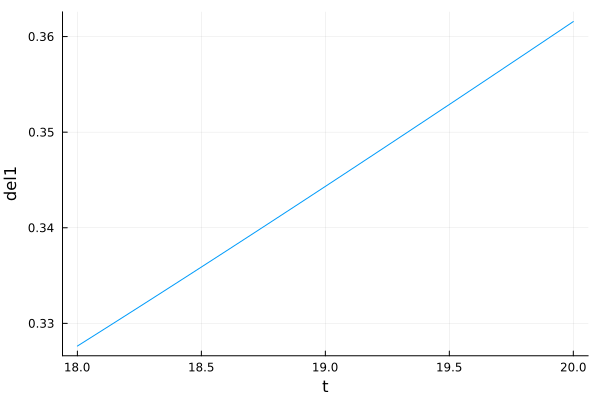

In [191]:
# post fault solution plot of del1

p13 = plot(sol3.t, y13, xlabel = "t", ylabel = "del1", legend = false)

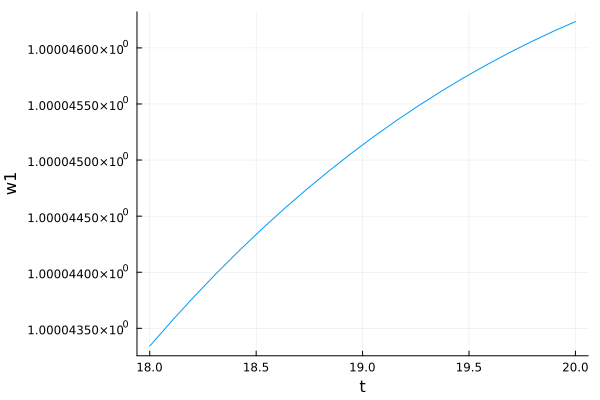

In [192]:
# post fault solution plot of w1

p14 = plot(sol3.t, y14, xlabel = "t", ylabel = "w1", legend = false)

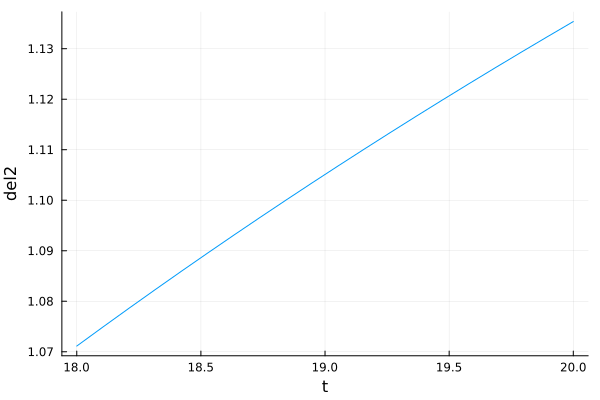

In [193]:
# post fault solution plot of del2

p15 = plot(sol3.t, y15, xlabel = "t", ylabel = "del2", legend = false)

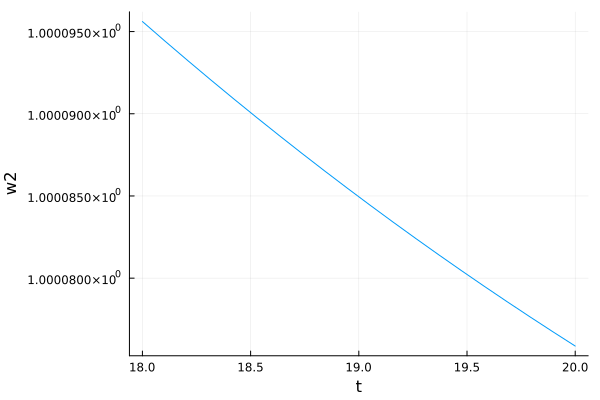

In [194]:
# post fault solution plot of w2

p16 = plot(sol3.t, y16, xlabel = "t", ylabel = "w2", legend = false)

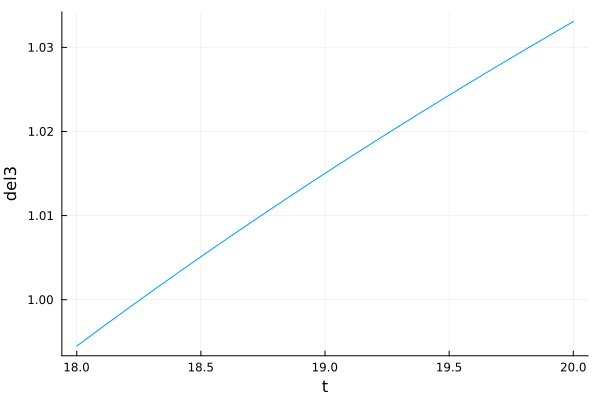

In [195]:
# post fault solution plot of del3

p17 = plot(sol3.t, y17, xlabel = "t", ylabel = "del3", legend = false)

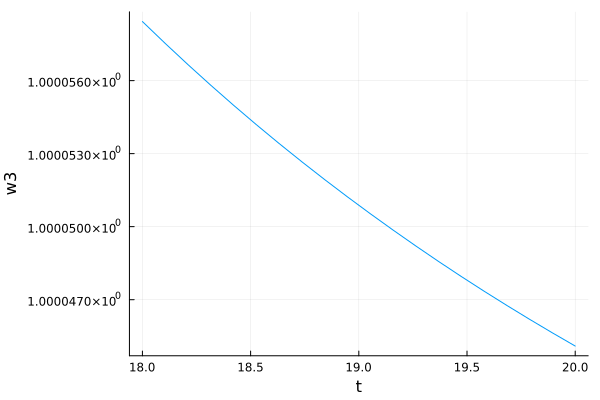

In [196]:
# post fault solution plot of w3

p18 =plot(sol3.t, y18, xlabel = "t", ylabel = "w3", legend = false)

In [197]:
# Combining pre fault, fault on and post fault solution to plot all three soultion together for 0-20 seconds

combined_t = vcat(sol1.t, sol2.t, sol3.t )  
combined_y1 = vcat(y1, y7, y13)
combined_y2 = vcat(y2, y8, y14)
combined_y3 = vcat(y3, y9, y15)
combined_y4 = vcat(y4, y10, y16)
combined_y5 = vcat(y5, y11, y17)
combined_y6 = vcat(y6, y12, y18);

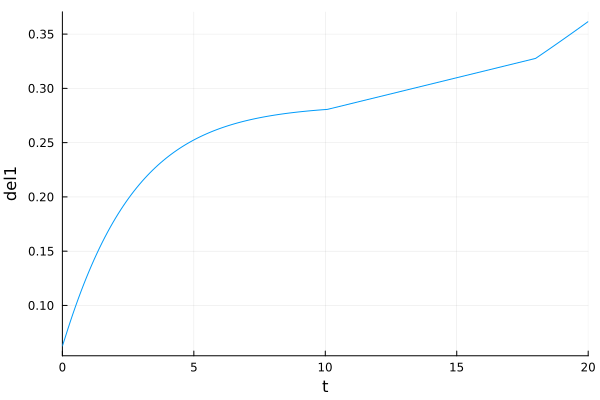

In [198]:
# Final plot of del1 from 0 to 20 seconds under pre fault, fault on and post fault condition






fdel1=plot(combined_t, combined_y1, xlabel = "t", ylabel = "del1", legend = false, xlims = (0, 20))

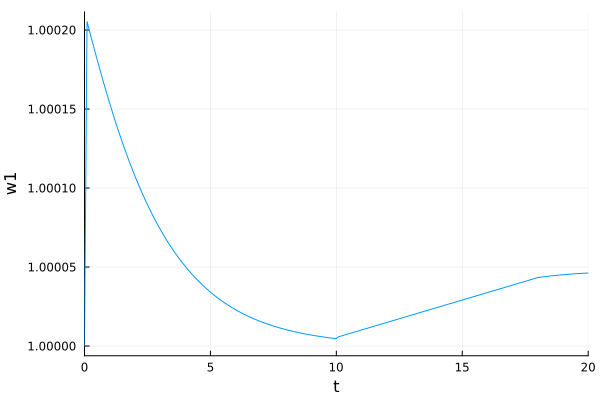

In [199]:
# Final plot of w1 from 0 to 15 seconds under pre fault, fault on and post fault condition

fw1=plot(combined_t, combined_y2, xlabel = "t", ylabel = "w1", legend = false, xlims = (0, 20))

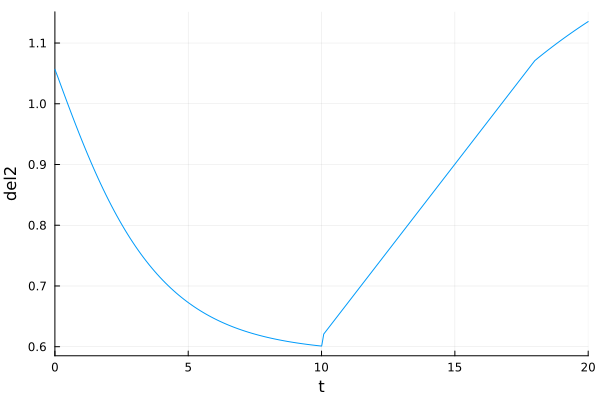

In [200]:
# Final plot of del2 from 0 to 15 seconds under pre fault, fault on and post fault condition

fdel2=plot(combined_t, combined_y3, xlabel = "t", ylabel = "del2", legend = false, xlims = (0, 20))

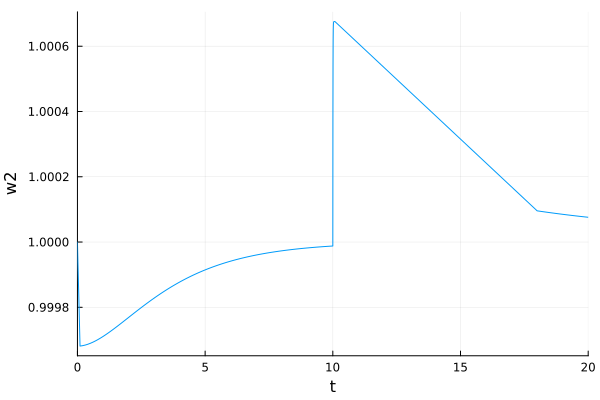

In [201]:
# Final plot of w2 from 0 to 15 seconds under pre fault, fault on and post fault condition

fw2=plot(combined_t, combined_y4, xlabel = "t", ylabel = "w2", legend = false, xlims = (0, 20))

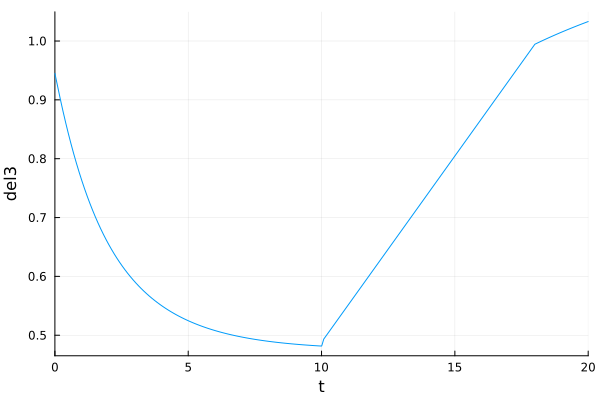

In [202]:
# Final plot of del3 from 0 to 15 seconds under pre fault, fault on and post fault condition

fdel3=plot(combined_t, combined_y5, xlabel = "t", ylabel = "del3", legend = false, xlims = (0, 20))

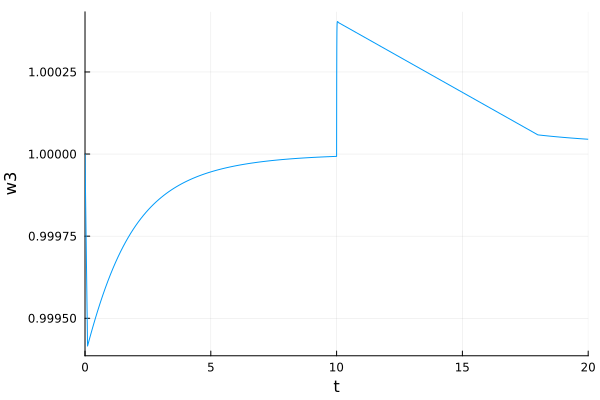

In [203]:
# Final plot of w3 from 0 to 15 seconds under pre fault, fault on and post fault condition

fw3=plot(combined_t, combined_y6, xlabel = "t", ylabel = "w3", legend = false, xlims = (0, 20))

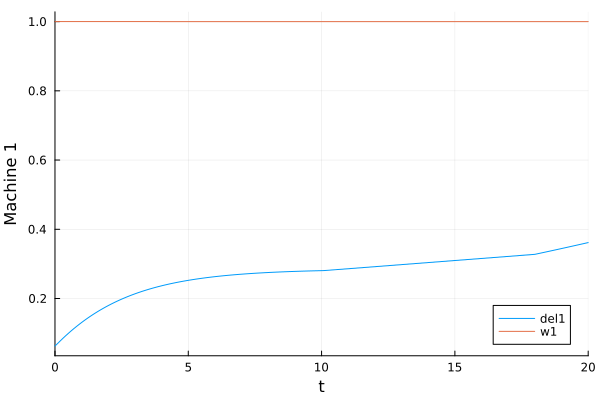

In [204]:
# Machine 1 variables (del1, w1) plot

plot(combined_t, combined_y1, xlabel = "t", ylabel = "Machine 1", label="del1", xlims=(0, 20), legend=true)
plot!(combined_t, combined_y2,  label="w1", xlims=(0, 20), legend=true)



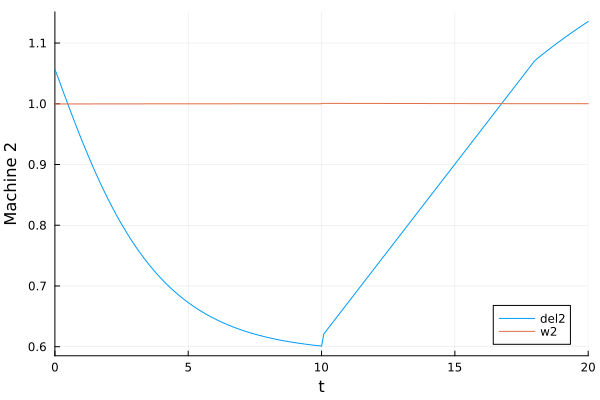

In [205]:
# Machine 2 variables (del2, w2) plot

plot(combined_t, combined_y3, xlabel = "t", ylabel = "Machine 2", label="del2", xlims=(0, 20), legend=true)
plot!(combined_t, combined_y4,  label="w2", xlims=(0, 20), legend=true)

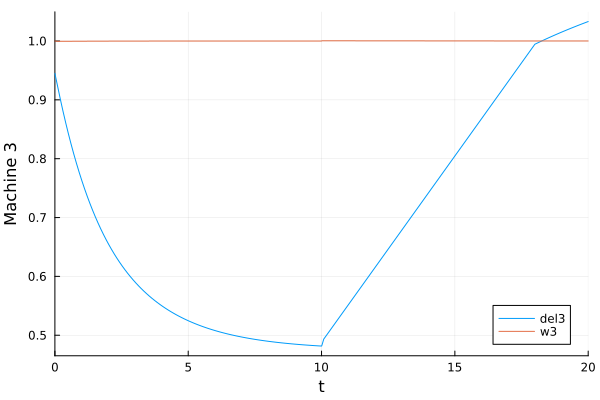

In [206]:
# Machine 2 variables (del3, w3) plot

plot(combined_t, combined_y5, xlabel = "t", ylabel = "Machine 3", label="del3", xlims=(0, 20), legend=true)
plot!(combined_t, combined_y6,  label="w3", xlims=(0, 20), legend=true)